[source](https://docs.microsoft.com/en-gb/learn/paths/optimize-basketball-games-with-machine-learning/?WT.mc_id=general_LinkedIn-wwl)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# Load data

In [2]:
player_df = pd.read_csv("player_data.csv")

# Explore data

In [3]:
player_df.head()

,ID,points,possessions,team_pace,Unnamed: 4,Unnamed: 5,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,1893.0,1251.8,97.8,NaN,NaN,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90
1,2,1386.0,1282.5,110.5,NaN,NaN,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30
2,3,1405.0,1252.3,105.8,NaN,NaN,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN
3,4,1282.0,1235.9,100.7,NaN,NaN,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35
4,5,1721.0,1254.0,105.7,NaN,NaN,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38


In [4]:
player_df.isna().sum()

ID              0
points          3
possessions     3
team_pace       3
Unnamed: 4     46
Unnamed: 5     46
GP              7
MPG             6
TS%             1
AST             1
TO              1
USG             1
ORR             1
DRR             1
REBR            1
PER            10
dtype: int64

In [5]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           46 non-null     int64  
 1   points       43 non-null     float64
 2   possessions  43 non-null     float64
 3   team_pace    43 non-null     float64
 4   Unnamed: 4   0 non-null      float64
 5   Unnamed: 5   0 non-null      float64
 6   GP           39 non-null     float64
 7   MPG          40 non-null     float64
 8   TS%          45 non-null     float64
 9   AST          45 non-null     float64
 10  TO           45 non-null     float64
 11  USG          45 non-null     float64
 12  ORR          45 non-null     float64
 13  DRR          45 non-null     float64
 14  REBR         45 non-null     float64
 15  PER          36 non-null     float64
dtypes: float64(15), int64(1)
memory usage: 5.9 KB


## Remove empty columns and rows 

In [6]:
# Drop empty columns
player_df.dropna(axis="columns", inplace=True, how="all")
player_df.isna().sum()

ID              0
points          3
possessions     3
team_pace       3
GP              7
MPG             6
TS%             1
AST             1
TO              1
USG             1
ORR             1
DRR             1
REBR            1
PER            10
dtype: int64

In [7]:
# Drop rows that don't have at least 12 non-null values
player_df.dropna(axis="rows", inplace=True, thresh=12)
player_df.isna().sum()

ID             0
points         0
possessions    0
team_pace      0
GP             6
MPG            5
TS%            0
AST            0
TO             0
USG            0
ORR            0
DRR            0
REBR           0
PER            9
dtype: int64

In [8]:
player_df.reset_index(drop=True, inplace=True)

In [9]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           42 non-null     int64  
 1   points       42 non-null     float64
 2   possessions  42 non-null     float64
 3   team_pace    42 non-null     float64
 4   GP           36 non-null     float64
 5   MPG          37 non-null     float64
 6   TS%          42 non-null     float64
 7   AST          42 non-null     float64
 8   TO           42 non-null     float64
 9   USG          42 non-null     float64
 10  ORR          42 non-null     float64
 11  DRR          42 non-null     float64
 12  REBR         42 non-null     float64
 13  PER          33 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 4.7 KB


In [10]:
player_df.describe()

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
count,42.000000,42.000000,42.000000,42.000000,36.000000,37.00000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,33.000000
mean,23.738095,1592.380952,1346.323810,106.526190,59.861111,35.27027,0.596357,26.221429,13.083333,30.478571,4.280952,14.850000,8.497619,22.594242
std,13.826555,351.876707,214.503887,6.676791,5.576239,1.91135,0.029284,5.199275,2.038282,4.919079,2.074025,7.277538,4.995876,7.255338
min,1.000000,183.000000,147.300000,89.700000,48.000000,30.50000,0.511000,14.800000,9.200000,16.500000,0.000000,0.900000,-2.900000,8.710000
25%,12.250000,1390.750000,1283.650000,102.400000,55.750000,34.10000,0.572250,23.275000,11.350000,26.975000,2.925000,8.475000,5.225000,20.120000
50%,23.500000,1680.000000,1369.800000,106.800000,60.500000,35.40000,0.604000,27.200000,13.500000,30.650000,4.650000,16.800000,9.150000,24.230000
75%,35.750000,1826.250000,1444.050000,111.950000,64.000000,36.90000,0.618750,30.550000,14.775000,34.850000,5.900000,20.325000,12.875000,28.380000
max,46.000000,2062.000000,1542.000000,118.800000,69.000000,38.80000,0.645000,33.200000,16.200000,36.700000,8.300000,29.400000,16.400000,34.260000


# Remove outliers

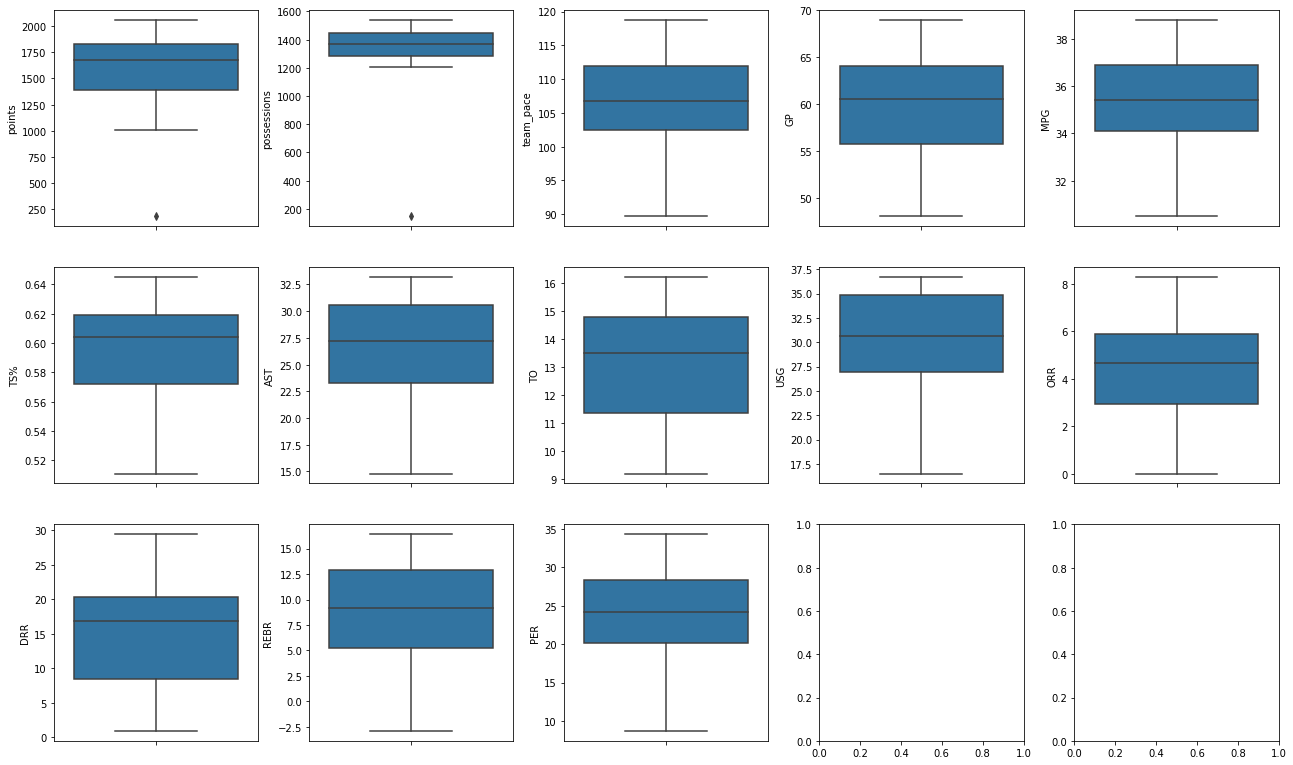

In [11]:
# Don't include the ID column
cols = list(player_df.columns)[1:]
fig, axes = plt.subplots(3, 5, figsize=(18, 11))
fig.tight_layout(pad=2.0)
for i in range(len(cols)):
    # Calculate in which matrix coordinate to draw the next plot
    matrix_coord = axes[i//5, i%5]
    sns.boxplot(ax=matrix_coord, y=player_df[cols[i]])

In [12]:
# Index of row with lowest points
points_outlier = player_df["points"].idxmin()
points_outlier

35

In [13]:
# Index of row with lowest possessions
possession_outlier = player_df["possessions"].idxmin()
possession_outlier

35

In [14]:
# Drop rows with outliers (both outliers come from the same row...)
player_df.drop(player_df.index[points_outlier], inplace=True)
player_df.shape

(41, 14)

In [15]:
player_df.reset_index(drop=True, inplace=True)

# Handle missing data

In [16]:
player_df.isna().sum()

ID             0
points         0
possessions    0
team_pace      0
GP             6
MPG            5
TS%            0
AST            0
TO             0
USG            0
ORR            0
DRR            0
REBR           0
PER            9
dtype: int64

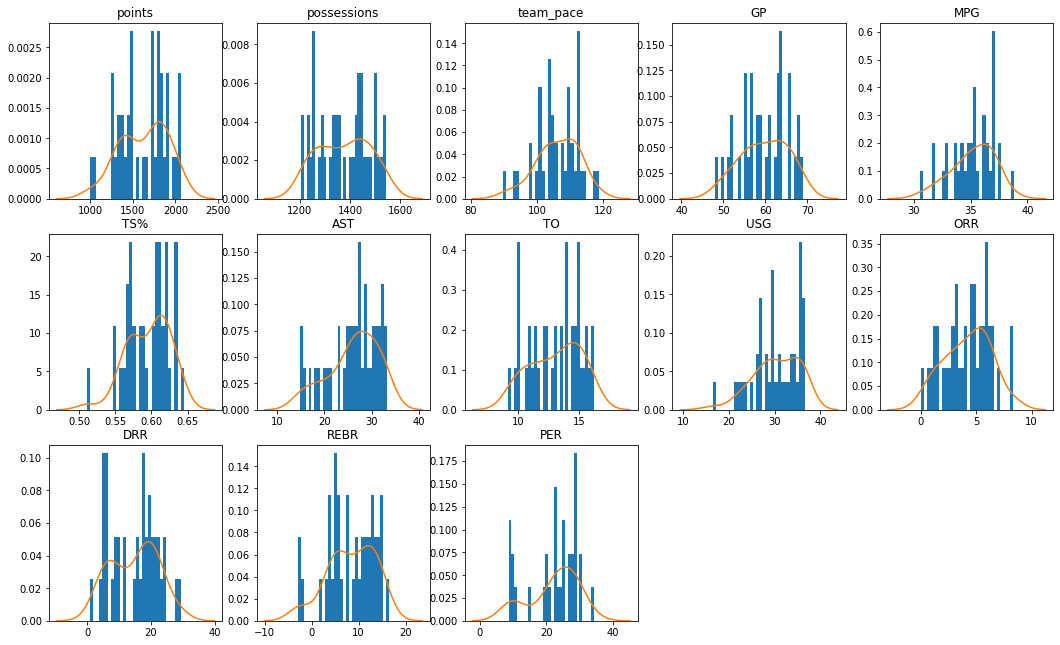

In [17]:
# All columns, except ID
cols = list(player_df.columns)[1:]

fig = plt.figure(figsize=(18,11))
fig.tight_layout(pad=5.0)

for i in range(len(cols)):
    current_col = cols[i]
    plt.subplot(3, 5, i+1)
    plt.hist(player_df[current_col], bins=30, density=True)
    plt.title(current_col)
    sns.kdeplot(player_df[current_col])
    plt.xlabel("")
    plt.ylabel("")

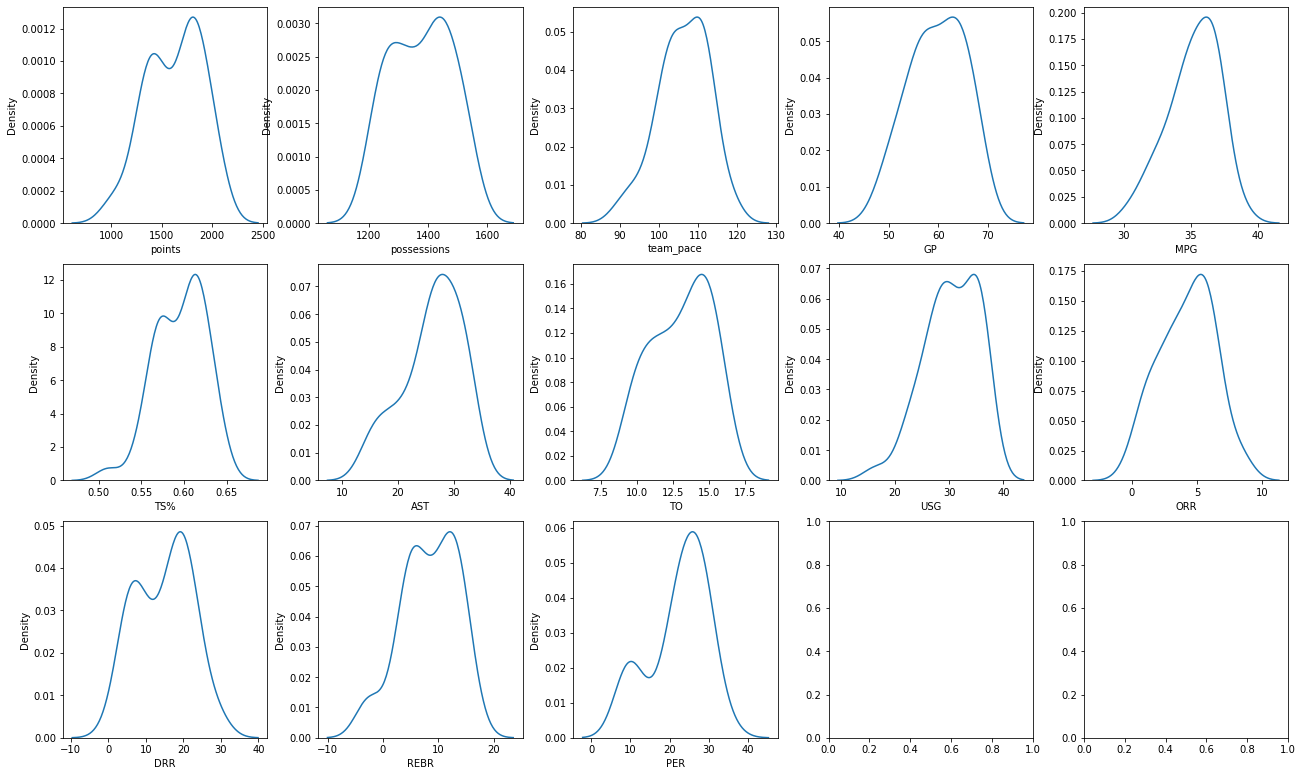

In [18]:
cols = list(player_df.columns)[1:]

fig, axes = plt.subplots(3, 5, figsize=(18, 11))
fig.tight_layout(pad=2.0)

for i in range(len(cols)):
    current_col = cols[i]
    sns.kdeplot(ax=axes[i//5, i%5], data=player_df[current_col])

### Distinguish human and Tune squad players

The Tune Squad players might have physical advantages over the human players, so let's hypothesise that this does happen and investigate the data further

Some histograms' KDE show a bimodal distribution
We can investigate these features further to distinguish the two populations (Tune and human players)
For example, in the points histogram, the population splits at about the 1600 points mark (i.e. players that scored 1600+ points)

In [19]:
player_df.loc[player_df["points"] >= 1600].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 40
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           23 non-null     int64  
 1   points       23 non-null     float64
 2   possessions  23 non-null     float64
 3   team_pace    23 non-null     float64
 4   GP           20 non-null     float64
 5   MPG          20 non-null     float64
 6   TS%          23 non-null     float64
 7   AST          23 non-null     float64
 8   TO           23 non-null     float64
 9   USG          23 non-null     float64
 10  ORR          23 non-null     float64
 11  DRR          23 non-null     float64
 12  REBR         23 non-null     float64
 13  PER          20 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 2.7 KB


In [20]:
# Let's narrow further including only players that have a DRR of 15 or higher
player_df.loc[(player_df["points"] >= 1600) & (player_df["DRR"] >= 15)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 40
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           18 non-null     int64  
 1   points       18 non-null     float64
 2   possessions  18 non-null     float64
 3   team_pace    18 non-null     float64
 4   GP           15 non-null     float64
 5   MPG          16 non-null     float64
 6   TS%          18 non-null     float64
 7   AST          18 non-null     float64
 8   TO           18 non-null     float64
 9   USG          18 non-null     float64
 10  ORR          18 non-null     float64
 11  DRR          18 non-null     float64
 12  REBR         18 non-null     float64
 13  PER          16 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 2.1 KB


In [21]:
# And from the 18 players found, the Tune Squad players should also have a higher PER according to the hypothesis
player_df.loc[(player_df["points"] >= 1600) & (player_df["DRR"] >= 15) & (player_df["PER"] >= 17)]

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
26,31,2049.0,1434.0,110.0,64.0,38.8,0.619,31.5,14.9,35.5,8.3,17.6,12.8,28.44
27,32,1795.0,1481.8,112.1,62.0,35.4,0.608,31.9,14.5,32.0,6.5,22.5,12.9,23.34
28,33,1805.0,1509.9,108.6,64.0,35.4,0.622,27.9,13.9,36.0,5.9,27.7,12.2,22.41
30,35,1963.0,1539.1,117.4,NaN,NaN,0.633,32.3,16.2,34.0,5.9,19.8,13.1,27.16
31,36,2062.0,1505.7,111.5,NaN,37.0,0.620,29.8,15.6,36.2,4.9,23.9,14.7,27.86
32,37,1845.0,1435.7,113.1,69.0,36.9,0.634,33.2,14.0,36.5,4.1,21.5,16.4,34.26
33,38,1778.0,1526.4,109.3,66.0,34.9,0.612,30.6,15.9,35.9,5.5,18.8,13.7,28.65
34,39,1901.0,1444.1,109.7,67.0,36.5,0.609,27.2,14.8,35.5,5.0,21.8,8.9,20.12
35,41,2030.0,1431.0,112.3,68.0,37.0,0.618,32.5,15.3,34.5,5.7,15.7,13.2,30.07
36,42,1631.0,1465.7,110.1,66.0,37.5,0.613,28.4,14.4,35.7,6.5,20.7,14.0,28.40


In [22]:
# Now create numbered labels for the players of each side
pop_list = list()
# Create the label
for id in player_df["ID"]:
    if id > 30:
        pop_list.append(f"tune_squad{id%30}")
    else:
        pop_list.append(f"player{id}")

player_df["player"] = pop_list
player_df.head()

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER,player
0,1,1893.0,1251.8,97.8,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90,player1
1,2,1386.0,1282.5,110.5,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30,player2
2,3,1405.0,1252.3,105.8,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN,player3
3,4,1282.0,1235.9,100.7,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35,player4
4,5,1721.0,1254.0,105.7,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38,player5


## Impute missing data

In [23]:
player_df.isna().sum()

ID             0
points         0
possessions    0
team_pace      0
GP             6
MPG            5
TS%            0
AST            0
TO             0
USG            0
ORR            0
DRR            0
REBR           0
PER            9
player         0
dtype: int64

In [24]:
# Because GP and MPG have a reasonably normal distribution according to the histograms, they can be imputed with the respective average values
player_df[["GP", "MPG"]] = player_df[["GP", "MPG"]].fillna(value=player_df[["GP", "MPG"]].mean())
player_df.isna().sum()

ID             0
points         0
possessions    0
team_pace      0
GP             0
MPG            0
TS%            0
AST            0
TO             0
USG            0
ORR            0
DRR            0
REBR           0
PER            9
player         0
dtype: int64

# Build the ML model

In [26]:
# Reoder columns to aid in selecting features and label columns
new_col_order = ["ID", "player"] + player_df.columns.tolist()[1: -1]
player_df = player_df[new_col_order]

# Remove rows with null values, and split the features and label columns
X = player_df.dropna(how="any").iloc[:, 5:-1].to_numpy()
y = player_df.dropna(how="any").iloc[:, -1].to_numpy()

In [29]:
lin_reg = LinearRegression()
# Use cross validation with k=10 to train and validate the model
scores = cross_val_score(lin_reg, X, y, cv=10, scoring="r2")
print(f"Mean r2 score: {scores.mean():.4f}")

Mean r2 score: 0.9995


10% of r2 scores are between 0.9985286254455977 and 0.9986604354784199
10% of r2 scores are between 0.9986604354784199 and 0.998792245511242
10% of r2 scores are between 0.9994512956753526 and 0.9995831057081748
10% of r2 scores are between 0.9995831057081748 and 0.9997149157409969
60% of r2 scores are between 0.9997149157409969 and 0.9998467257738191


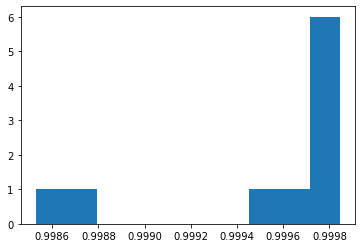

In [30]:
# Plot the scores of each cross validated model 
entries, bin_edges, patches = plt.hist(scores, bins=10)
for i in range(len(entries)):
    if entries[i] > 0:
        bin_percentage = entries[i] * 100 / len(entries)
        print(f"{bin_percentage:.0f}% of r2 scores are between {bin_edges[i]} and {bin_edges[i+1]}")

In [31]:
# Fit the model but using the whole dataset this time
lin_reg.fit(X, y)

LinearRegression()

In [33]:
# Create a mask of boolean missing/not missing rows for PER
mask = player_df.isnull().any(axis=1)
mask.head()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [34]:
# Predict missing PER values by having the model predict them using the feature columns
# Since the mask has boolean values, it can be used to only select rows for which the mask is True, i.e., rows with missing PER
player_df.loc[mask, "PER"] = lin_reg.predict(player_df.loc[mask].iloc[:, 5:-1])

player_df.isna().sum()

ID             0
player         0
points         0
possessions    0
team_pace      0
GP             0
MPG            0
TS%            0
AST            0
TO             0
USG            0
ORR            0
DRR            0
REBR           0
PER            0
dtype: int64

In [35]:
player_df

,ID,player,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,player1,1893.0,1251.8,97.8,63.000000,33.900000,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.900000
1,2,player2,1386.0,1282.5,110.5,58.000000,32.500000,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.300000
2,3,player3,1405.0,1252.3,105.8,55.000000,36.300000,0.605,25.7,13.9,28.1,4.5,4.9,1.8,16.595759
3,4,player4,1282.0,1235.9,100.7,54.000000,37.600000,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.350000
4,5,player5,1721.0,1254.0,105.7,59.000000,30.500000,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.380000
5,6,player6,1004.0,1322.4,102.1,57.000000,36.300000,0.574,20.3,13.5,31.0,1.2,20.5,3.4,9.830000
6,7,player7,1920.0,1207.6,109.8,55.000000,37.000000,0.573,26.0,13.1,30.7,0.0,10.3,-2.6,8.710000
7,8,player8,1353.0,1348.1,112.2,57.000000,35.208333,0.574,24.4,11.3,26.3,5.5,5.8,-2.2,8.717454
8,10,player10,1468.0,1400.9,93.7,61.000000,35.600000,0.547,22.9,12.2,22.7,5.8,6.4,-2.9,3.115350
9,11,player11,1856.0,1303.8,93.4,55.000000,33.600000,0.563,28.9,14.7,26.7,1.4,17.3,4.3,9.670000


In [ ]:
# Output the finalised dataset
player_df.to_csv("player_data_final.csv", index=False)